# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [1]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
% matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format( * data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: One dimension that might show up would be the spread of the data showing the range of each catagory.

###PCA

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca.fit(data)
# Print the components and the amount of variance in the data contained in each dimension
print 'PCA components:\n{}'.format(pca.components_)
print 'PCA explained variance ratio:\n{}'.format(pca.explained_variance_ratio_)

PCA components:
[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
PCA explained variance ratio:
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: The variance drop off pretty quickly, from -0.97 to -0.12 in just two principal components. If I'm to use PCA I would choose 2 or 3 dimensions for this analysis, because the variance seems to be explained by 2 to 3 groups. The first component has a lot of variance, and the rest of the components do not.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: The dimensions represent new composite features that represent original features that are highly correlated. I can use this information to infer correlations between features and combine them in a meaningful way.

###ICA

In [3]:
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
from sklearn import preprocessing

ica = FastICA()
scaled_data = preprocessing.scale(data)
ica.fit(scaled_data)
# Print the independent components
print 'ICA components:\n{}'.format(ica.components_)
print 'ICA components * 1000:\n{}'.format(abs(ica.components_.round(6) * 1000))

ICA components:
[[-0.00489473 -0.00166262 -0.00559194 -0.00253114  0.00242996  0.05096711]
 [ 0.00210507  0.07214979 -0.05623139 -0.00164607  0.01779785 -0.01684924]
 [-0.0024896   0.01344448 -0.06903446 -0.00145526  0.01294687  0.00506901]
 [ 0.00346233 -0.01898287 -0.10920616  0.00723911  0.13341324  0.01612773]
 [-0.05025609  0.00660221  0.00698566  0.00323366 -0.01106515  0.00272906]
 [ 0.01091029  0.0010601  -0.00737799 -0.05405419  0.00258365  0.0167625 ]]
ICA components * 1000:
[[   4.895    1.663    5.592    2.531    2.43    50.967]
 [   2.105   72.15    56.231    1.646   17.798   16.849]
 [   2.49    13.444   69.034    1.455   12.947    5.069]
 [   3.462   18.983  109.206    7.239  133.413   16.128]
 [  50.256    6.602    6.986    3.234   11.065    2.729]
 [  10.91     1.06     7.378   54.054    2.584   16.762]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: In the first vector there's a high demand in delicatessen as well as some fresh products and grocery, meaning these customers potentially operate deli section in a store or similar style sandwich shops. 

In the second one there's high demand for milk, grocery, detergents_paper, delicatessen, with high concentration on milk and grocery. This could be a big box low cost store like Walmart that sells a bit of everything.

The third one has high demand for grocery with some in milk and detergents_paper. This would include all different varieties of smaller sized general stores like neighborhood supermarkets, to grocery stores in urban settings, and some convenience stores.

The fourth one has enormous concentration on grocery and detergents_paper, and some in milk and delicatessen. This could be some type of specialty service like grocery delivery service, or a catering service, or some other specialized food service that thrives in a niche market.

The fifth one has high demand in fresh products, so it's likly some kind of farmers market.

The sixth one has high demand in frozen products, so it's probably Aldi. Other potential customers would include ice cream shops.

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: K Means clusting can help you visualize the data and find the groups with equal variance. GMM is the fastest algorithm for learning mixture models. Also as this algorithm maximizes only the likelihood, it will not bias the means towards zero, or bias the cluster sizes to have specific structures that might or might not apply.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [3]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [4]:
reduced_data = PCA(n_components=2).fit_transform(data)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [88]:
# The visualizer below assumes your clustering object is named 'clusters'

clusters = KMeans()
# clusters = GMM()
clusters.fit(reduced_data)
print clusters

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [89]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [90]:
# centroids = clusters.means_
centroids = clusters.cluster_centers_
print centroids

[[-31677.01702205  -6255.39517189]
 [  7012.62228466   6928.39601904]
 [-20964.64986166  68819.21772923]
 [-14389.27388383  -2507.41605083]
 [  7855.70387893  -5357.47365718]
 [-74982.98228094  -1461.38586695]
 [  2787.06628956  24275.2601508 ]
 [ -2900.14423445  -6032.43569237]]


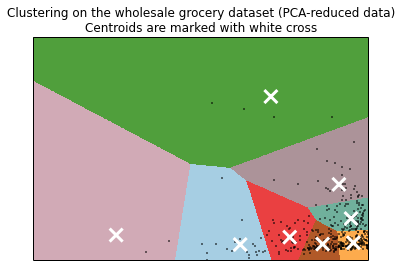

In [91]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: The central objects in each cluster represent a typical customer in that segment of the market. For example in the dense cluster on the bottom right it would mean that there's many customers that are similar to one another and the central object would be the average, or the plain version of those customers

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: I feel clustering gives me the most insight into the data because it visualizes the data into definitive groups. This is much faster for me to gain insight into as opposed to trying to extrapolate information from just numbers.

**9)** How would you use that technique to help the company design new experiments?

Answer: I would use clustering to limit the impact of new experiments. For example if the company wants to change something it can apply the change to a certain cluster of customers, and see how the metrics change. This way if the experiments result in negative impact it won't affect the entire customer base.

**10)** How would you use that data to help you predict future customer needs?

Answer: From the looks of the PCA reduced data it seems that most of the customer can be placed into somewhere along the x-axis or the y-axis with the origin at the bottom right. Once the company can clarify the traits or labels that apply to those customers then they can provide two different types of customer service that are tailored to those customers, and improve the customer satisfaction rate as a whole. 